필수과제 2
- 고객데이터를 기반으로 가설을 세워서 어떤 컬럼을 사용할 것인지 정리하고, 해당 컬럼을 기반으로 kmeans를 진행하여 분석에 대한 인사이트 정리

In [ ]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/NH.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##데이터 확인

In [ ]:
df

,Unnamed: 0,계좌,성별,연령구간,투자성향,고객자산구간,주거래상품군,LIFESTAGE,고객등급,총투자기간,주거래업종구분
0,0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9
3,3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16
4,4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2fdd734bf8fc04c0d484ddc1d021622a1cdc802705702e...,1,9,4,2,2,9,5,2,16
9996,9996,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,2,2,3,1,2,2,9,1,16
9997,9997,7702030b3b0760e6b37c8a3e8ed58611b1b85913526ad1...,2,7,4,2,2,5,5,2,16
9998,9998,4006ddaa5673365096b9dd5965e20db866f6523c162f79...,1,5,99,5,2,5,3,2,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   계좌          10000 non-null  object
 2   성별          10000 non-null  int64 
 3   연령구간        10000 non-null  int64 
 4   투자성향        10000 non-null  int64 
 5   고객자산구간      10000 non-null  int64 
 6   주거래상품군      10000 non-null  int64 
 7   LIFESTAGE   10000 non-null  int64 
 8   고객등급        10000 non-null  int64 
 9   총투자기간       10000 non-null  int64 
 10  주거래업종구분     10000 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 859.5+ KB


In [ ]:
df.isna().sum()

Unnamed: 0    0
계좌            0
성별            0
연령구간          0
투자성향          0
고객자산구간        0
주거래상품군        0
LIFESTAGE     0
고객등급          0
총투자기간         0
주거래업종구분       0
dtype: int64

##K-means 사용하기

In [ ]:
df.columns

Index(['Unnamed: 0', '계좌', '성별', '연령구간', '투자성향', '고객자산구간', '주거래상품군',
       'LIFESTAGE', '고객등급', '총투자기간', '주거래업종구분'],
      dtype='object')

In [ ]:
#df.고객자산구간.value_counts()
#df.고객자산구간.unique()

1    3572
2    2740
4    1222
3    1147
5     984
6     335
Name: 고객자산구간, dtype: int64

In [ ]:
df_sp=df[['연령구간', '투자성향','고객자산구간','고객등급']]

In [ ]:
df_sp

,연령구간,투자성향,고객자산구간,고객등급
0,4,99,1,3
1,6,4,4,2
2,7,4,3,5
3,6,4,4,3
4,5,2,2,5
...,...,...,...,...
9995,9,4,2,5
9996,2,3,1,9
9997,7,4,2,5
9998,5,99,5,3


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

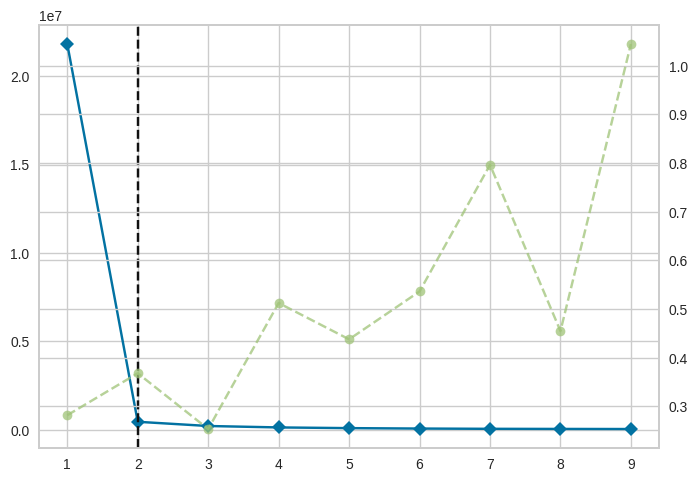

In [ ]:
# 군집 개수 결정
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df_sp)

In [ ]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=111)
kmeans

KMeans(n_clusters=2, random_state=111)

In [ ]:
kmeans.fit(df_sp)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=111)

In [ ]:
#실제 군집 모습 확인
print(kmeans.labels_)

[1 0 0 ... 0 1 0]


In [ ]:
#cluster는 우리가 비지도학습으로 만든 컬럼
df_sp['cluster'] = kmeans.labels_

<ipython-input-177-a91c2568704a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['cluster'] = kmeans.labels_


In [ ]:
df_sp

,연령구간,투자성향,고객자산구간,고객등급,cluster
0,4,99,1,3,1
1,6,4,4,2,0
2,7,4,3,5,0
3,6,4,4,3,0
4,5,2,2,5,0
...,...,...,...,...,...
9995,9,4,2,5,0
9996,2,3,1,9,0
9997,7,4,2,5,0
9998,5,99,5,3,1


In [ ]:
df_sp.groupby(['cluster'])['고객등급'].count()

cluster
0    6313
1    3687
Name: 고객등급, dtype: int64

In [ ]:
cl_0 = df_sp[df_sp['cluster'] == 0]
cl_0.describe()

,연령구간,투자성향,고객자산구간,고객등급,cluster
count,6313.000000,6313.000000,6313.000000,6313.000000,6313.0
mean,4.472200,3.213211,2.580706,5.644385,0.0
std,2.084684,1.211545,1.519681,5.015417,0.0
min,1.000000,0.000000,1.000000,1.000000,0.0
25%,3.000000,2.000000,1.000000,4.000000,0.0
50%,4.000000,3.000000,2.000000,5.000000,0.0
75%,6.000000,4.000000,4.000000,9.000000,0.0
max,9.000000,9.000000,6.000000,99.000000,0.0


In [ ]:
cl_1 = df_sp[df_sp['cluster'] == 1]
cl_1.describe()

,연령구간,투자성향,고객자산구간,고객등급,cluster
count,3687.000000,3687.0,3687.000000,3687.000000,3687.0
mean,5.042040,99.0,2.174939,6.855438,1.0
std,2.182061,0.0,1.378480,7.693356,0.0
min,1.000000,99.0,1.000000,1.000000,1.0
25%,3.000000,99.0,1.000000,4.000000,1.0
50%,5.000000,99.0,2.000000,5.000000,1.0
75%,7.000000,99.0,3.000000,9.000000,1.0
max,9.000000,99.0,6.000000,99.000000,1.0


투자 성향에 따른 두 군집으로 나누어졌음을 확인할 수 있다.